#  **Neural Network**
---
## **Summary**
to be added ...
    
## **References**
1. Goodfellow, I, Bengio, Y., Courville, Aaron. 2016. Deep learning. The MIT Press.
2. Géron, A. 2017. Hands-Machine Learning with Scikit-Learn & TensorFlow. O'Reily Inc.

## **Concept**
<font size=4 color=red>**1.1 The Basic Arhitecture of Sinlge Layer (Preception) Neural Network**</font>                                   
#### <font color=blue>A Neuron really computes two functions within a node</font>
* Summation $\sum$ and activation $\Phi$                                            
* <font size=3>For a situation where each training instance is of the from ($\overline{X}, y$), where $\overline{X} = [x_1,...,x_d]$ containg $d$ features, and $y\in${-1, +1} contains the _observed value_ of the binary class variable.</font>
<font size=3>The input layer contains _d_ nodes that transmit the _d_ features $\overline{X}$ with edges of weight $\overline{W} = [w_1,..., w_d]$ to an output node, then $$\hat{y} = sign\left\{\overline{W}\cdot{\overline{X}}\right\} = sign\left\{\displaystyle{\sum_{j=1}^{d}w_jx_j}\right\}$$ or with ___bias___(_b_) $$\hat{y} = sign\left\{\overline{W}\cdot{\overline{X}} + b\right\} = sign\left\{\displaystyle{\sum_{j=1}^{d}w_jx_j} +b\right\}$$ sign function ***maps*** a real value to either -1 or +1 for binary classification. The erro of the prediction is therefore $E(\overline{X}) = y-\hat{y}$, which is one of the values drawn from the set {-2, 0, +2}.</font>                                              
#### The ***bias*** can be incorporated as the weight of an edge by using a ***bias neuron*** through:
* Adding a neuron: transmiting a value of 1 to the output node
* Feature engineering trick: additional feature with a constant value of 1

#### **1.1.1 Loss function**: to minimize the error in the prediction
$$Minimize_{\overline{W}}L = \displaystyle\sum_{(\overline{X}, y)\in{D}}(y - \hat{y})^2 = \displaystyle\sum_{(\overline{X}, y)\in{D}}\left(y - sign\left\{\overline{W}\cdot{\overline{X}}\right\}\right)^2$$
* The sign function is non-differentiable; taking on constant values over large portion of the domain $\Longrightarrow$ zero values at differential points
* A staircase-like loss surface $\Longrightarrow$ **NOT** suitable for gradient-descent.
* Solution: a smooth approximation defined by *preceptron criterion* (<font color=red>NOT true gradient of the staircase-like surface</font>) $$\nabla L_{smooth} = \displaystyle\sum_{(\overline{X}, y)\in{D}}(y - \hat{y})\overline{X}$$

#### **1.1.2 Choice of Activation Function $\Phi(\cdot)$**
* Pre- vs Post-activation
    * Pre-activation: value computed before applying the activation function
    * Post-activation: value computed after applying the activation function
* Activation Functions
    * <font color=red><b>Identity or linear: $\Phi(v) = v$</b></font>
        * used in the output node when the target is a real value
        * used for discrete outputs when a smoothed surrogate loss function needs to be set up
        * <font color=green>derivative is 1: non-differentiable</font>
    * <font color=red><b>Sign: $\Phi(v) = sign(v)$</b></font>
        * map to binary outputs at prediction time only; non-differentiability prevents from creating the loss function at training time, and only linear activation during the training
        * <font color=green>derivative is 0 at all values of _v_ other than *v* = 0 $\Longrightarrow$ zero gradient and non-differentiable; rarely used in the loss function</font>
    * <font color=red><b>Sigmoid: $\Phi(v) = \frac{1}{1 + e^{-v}}$</b></font>
        * outputs in (0, 1)
        * interprted as probablity dervied from maximum-likelihood
        * historical tool for incorportating nonlinearity in neural network
        * <font color=green>derviative $\frac{\partial{o}}{\partial{v}} = \frac{exp(-v)}{(1+exp(-v))^2} =  o(1-o)$: often used as a function of the output.</font>
    * <font color=red><b>Tanh: $\Phi(v) = \frac{e^{2v} - 1}{e^{2v} + 1}$  $\Longrightarrow$ $tahn(v) = 2\cdot{sigmoid(2v)} - 1$</b></font>
        * outputs rescaled to [-1, 1]
        * similar to sigmoid, but its mean-centering and larger gradient $\Longrightarrow$ easier to train.
        * historical tool for incorportating nonlinearity in neural network
        * <font color=green>derviative $\frac{\partial{o}}{\partial{v}} = \frac{4\cdot{exp(2v)}}{(exp(2v) +1)^2} =  1-o^2$</font>
    * <font color=red><b>Rectified Linear Unit (ReLU): $\Phi(v) = max\left\{v, 0\right\}$</b></font>
        * easier to train multiple layered neural network, replacing sigmoid
        * modern neural network activation function
        * <font color=green>derviative: 1 for non-negative values of its argument, and 0, otherwise.</font>
    * <font color=red><b>Hard tanh: $\Phi(v) = max\left\{min[v, 1], -1\right\}$</b></font>
        * easier to train multiple layered neural network, replacing sigmoid
        * modern neural network activation function
        * <font color=green>derviative: 1 for the argument $\in[-1, +1]$ and 0, otherwise.</font>

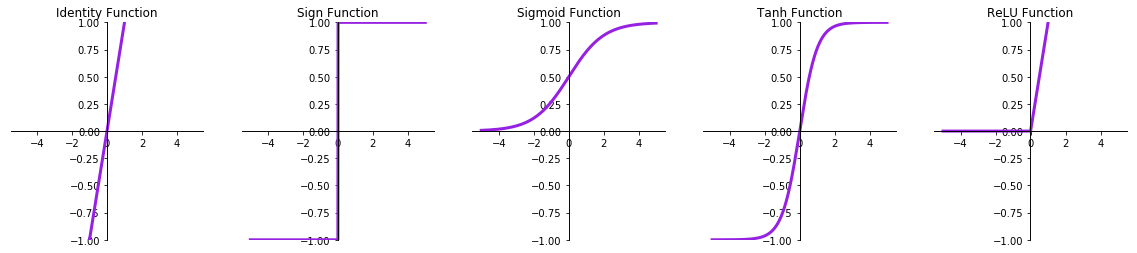

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def identity(x):
    i = x
    return i

sign = np.sign

def  sigmoid(x):
    s = 1/(1 + np.exp(-x))
    return s

def tanh(x):
    t = (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
    return t

def relu(x):
    r = np.maximum(x, 0)
    return r

x = np.arange(-5, 5, 0.01)


activation_funcs = [identity, sign, sigmoid, tanh, relu]
function_names = [
    'Identity Function', 
    'Sign Function', 
    'Sigmoid Function', 
    'Tanh Function', 
    'ReLU Function'
]

fig, ax =  plt.subplots(1, 5, figsize = (20, 4))

for i in range(0, len(activation_funcs)):
    ax[i].spines['left'].set_position('center')
    ax[i].spines['bottom'].set_position('center')
    ax[i].spines['right'].set_position('center')
    ax[i].spines['top'].set_position('center')
    ax[i].xaxis.set_ticks_position('bottom')
    ax[i].yaxis.set_ticks_position('left')
    ax[i].set_ylim([-1, 1])
    
    ax[i].plot(
        x, 
        activation_funcs[i](x), 
        color='#9621E2', 
        linewidth=3
    )
    ax[i].set_title(function_names[i])


#### **1.1.3 Choice and Number of Output Nodes**
* Tie to the activation functions that depend on the application
    * e.g., *k*-way classification (intended) $\Longrightarrow$ _k_ outputs with softmax activation function
    * The activation function for te *i*th output is defined as: $$\Phi(\bar{v})_i = \frac{exp(v_i)}{\sum_{j=1}^{k}exp(v_j)} $$
    * An example of the softmax function with three outputs $\Longrightarrow$ coverting the three outputs into probablilites with the softmax function       

#### **1.1.4 Choice of Loss Function**
* Hinge loss: $L = max\left\{0, 1-y\cdot\hat{y}\right\}$, where $y\in{\left\{-1, +1\right\}}$ $\Longrightarrow$ SVM

##### **1.1.4.1 Binary targets (logistic regression)**
* $L = log(1+exp(-y\cdot{\hat{y}))}$: assuming the observed value $\in{\left\{-1, +1\right\}}$, and prediction $\hat{y}$ is an arbitrary numerical value on suing the identity activation function.

##### **1.1.4.2 Categorical targets (using the softmax activation function)**
* $L = -log(\hat{y}_r)$: implementing multinomial logistic regression  $\Longrightarrow$ <font color=red>*cross-entropy loss*</font>

<font size=4 color=red>**1.2 Multilayer Neural Networks**</font>                                                                                   
Multiple computational layers: the ***hidden layers*** between input an outputs
#### 1.2.1 Example: Feed-forward network
* sequentially feed the successive layers in the forward direction
* assume all nodes in one layer are connected to those of the next layer
* The weights of the connections b/w the input layer and the first hidden layer are contained in a _matrix_ $W_1$ with size $d\times{p_1}$, where the weights b/w the *r*th hidden layer and the (*r*+1)th hidden layer are denoted by the $p_r\times{p_{r+1}}$ matrix denoted by $W_r$.
    * $\overline{h}_1 = \Phi(W_1^T\overline{x})$ $\Longrightarrow$ <font color=brown>Input to Hidden Layer</font>
    * $\overline{h}_{p+1} = \Phi(W_{p+1}^T\overline{h}_p)$     $\forall{p}\in{\left\{1,..., k-1\right\}}$ $\Longrightarrow$ <font color=brown>Hidden to Hidden Layer</font>
    * $\overline{o} = \Phi(W_{k+1}^T\overline{h}_k)$ $\Longrightarrow$ <font color=brown>Hidden to Output Layer</font>

#### 1.2.2 Example: Convolutional network
* weight pruning and sharing: e.g., image data

<font size=4 color=red>**1.3 Training Neural Network with Backpropagation**</font>                                        
* **Backrpogation algorithm**: <font color=blue>computing the error gradients in terms of summations of local-gradient products over the various paths froma node the ouput</font>
    * A direct application of dynamic programming
    * Two phases: _forward_ vs *backword*
    
#### 1.3.1 Forward phase: the inputs for a training instance are fed into the neural network
* A forward cascade of computation across the layers with current set of weights
* The derivative of the loss fuction with respect to the output is computed
* The derivative will be computed with respect to the weights in all layers in the backward phase                            

#### 1.3.1 Backward phase: compute the graident of the loss function with respect to the different weights by using the chain rule of differential calculus
* Gradient for updating the weights
* Starting from the ouput node

<font size=4 color=red>**1.4 Practical Issues in Neural Network Training**</font>     
#### 1.4.1 Overfitting
* Remedies
    * Regularization
    * Architecture and Parameter Sharing
    * Early Stopping
    * Breadth vs Depth
    * Ensemblre

#### 1.4.2 Gradient Vanishing and Explodeing

#### 1.4.3 Hardly Convergence

#### 1.4.4 Local and Spurious Optima

#### 1.4.5 Computational Challenges

<font size=4 color=red>**1.5 The Power of Function Composition**</font>                                      
**'Much of the power of deep learning arises from the fact that the <font color=red>_repeated composition of certain types of functions increases the representation power of the network, and therefore reduces the parameter space requred for learning_</font>'**           

* <font color=green>**Theorem**</font>: _A multi-layer network that uses only the identity activation function in all its layers reduces to a single-layer network performing linear regression_.
* <font color=brown>**Lemma**</font>: _Consider a multilayer network in which all hidden layers use identity activation and the single output node uses the perceptron criterion as the loss function and sign activation for prediction. This neural network reduces to the single-layer perceptron._

#### 1.5.1 Nonlinear Activation
* <font size=3 color=red>Activation functions enable nonlinear mappings of the data, so that the embedded points can become linearly separable.</font>
* e.g., A=(-1,1), B=(0,1), C=(1,1)
    * Not linearly separable $\Longrightarrow$ Linear activation NOT working $\Longrightarrow$ Nonlinear activation
        * Hidden units applied with ReLU activation function
        $$h_1 = max{\left\{x_1, 0\right\}}$$
        $$h_2 = max{\left\{-x_1, 0\right\}}$$
    * A=(0,1), B=(0,0), C=(1,0) $\Longrightarrow$ linearly separable
* XOR function separating points {(0,0), (1,1)} and {(1,0),(0,1)} into two different classes.

#### 1.5.2 Reducing Parameter Requriment with Depth (breadth vs depth)

<font size=4 color=red>**1.6 Common Neural Architectures**</font>                                              
#### 1.6.1 Shallow Models (1 or 2 layers)
* linear regression, classification, support vector machine, logistic regression, singular value decomposition, matrix factorization, and etc
* Similating and learning neural networks
* Deep learning: stacking the simpler models in a creative way

#### 1.6.2 Radial Basis Function Network (RBF)
* Not deep, typically having two only two layers
* 1st layer: unsupervised training; 2nd layer: supervised training
* Gain insights from expanding the size of the feature space rather than depth
* 2nd layer training: supervised nearest neighborhood classification

#### 1.6.3 Restricted Boltzmann Machines (RBMs)
* Using the notion of energy minimization to modeling data in an unsupervised way
* Requiring Monte Carlo sampling in order to train
* Algorithm: _constrastive divergence algorithm_

#### 1.6.4 Recurrent Neural Networks
* Designedd for sequential data, e.g., text sentence, time-series, biological sequences, and etc
* Backgpropagation algorithm: Backpropagation through time (BPTT)

#### 1.6.5 Convolutional Neural Network (a sparse architecture)
* **Image classification and object detection**
* Hubel and Wiesel's understanding of how cat's visual cortex works: specific portion of the visual field excites particular neurons
* <font color=red>Each layer</font>: 3-dimensional (corresponding to RGB in input layer or hidden features maps that encode various types of the shape in the image)
* Two types of layers: ***convolution*** and ***subsampling*** layers
    * Convolution operation: a filter to map the activations from one layer to the next
    
#### 1.6.6 Hierarchical Feature Engineering and Pretrain Models

### **2. Basics of Feedforward Neural Network in Keras**
* Remember that each _unit_ (node or neuron) in the hidden layers:
    * 1. Receives a number of inputs
    * 2. Weights each input by a parameter value
    * 3. Sums together all weighted inputs along with some bias (typically 1)
    * 4. Most often then applies some funciton (called an _activation function_)
    * 5. Sends the output on to units in the next layer

#### <font color=blue>General requirments for constructing a neural network</font>
* <font size= 3 color=red>**First**</font>: Define the number of the units to include in each layer and the activation funciton in the hidden and output layers.
    * The more units, the more to learn complex patterns
        * __Caution__: overfit the training data
        * A popular activation function: <font color=red>_rectified linear unit (Re LU)_</font>
        $f(z) = max(0,z)$, where $z$ i sthe sum of the weighted inputs and bias.
        * other activation fuctions: e.g., sigmoid, softmax, etc                                        

* <font size= 3 color=red>**Second**</font>: Define the number of the hidden layers
    * Complex relationship vs computational cost

* <font size= 3 color=red>**Third**</font>: Define the structure of the activation function of the output layer and loss function
    * <font color=blue>Binary classification</font>: Binary cross-entropy
    * <font color=orange>Multiclass classification</font>: Categorical cross-entropy
    * <font color=brown>Regression</font>: Mean square error ($MSE = \frac{1}{n}\displaystyle\sum_{i=1}^{n}(\hat{y_i}-y_i)^2$)

* <font size= 3 color=red>**Fourth**</font>: Define the optimizer
    * e.g., stochastic gradient descent (SGD),stochastic gradient descent with momentum, root mean square propagation, adaptive moment estimation

* <font size= 3 color=red>**Fifth**</font>: Evaluate performance with one or multiple metrics

#### <font color=blue>Keras: Two ways to create neural works</font>
* Sequential model: stacking layers togeter
* Functional API: for researchers rather than practitioners

#### <font color=blue>Some basic parameters of the Keras</font>
* '<font color=red>dense</font>': fully connected, all units in the previous layer are connected to all the neurals in the next layer
* '<font color=red>units =</font>': the number of the units with activation function
* '<font color=red>activation = 'relu'</font>': ReLU activation function
* '<font color=red>input_shape = (10, )</font>': the first layer of any network has to include this parameter, e.g., 10 feature values
* '<font color=red>RMSProp</font>': a optimization algorithm
* '<font color=red>binary_crossentropy</font>': a loss function

### 2.1 Building a Neural Network Model with Keras
* Binary classifier
* Multiclass classifier
* Regression

<font color=brown>**2.1.1 Binary classifier**</font>

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(9)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_of_features)

tokenizer = Tokenizer(num_words =  number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode = 'binary')

network = models.Sequential()

network.add(layers.Dense(units = 16, activation = 'relu', input_shape = (number_of_features, )))
network.add(layers.Dense(units = 16, activation = 'relu'))
network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss = 'binary_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['accuracy'])

history = network.fit(features_train,
                      target_train, 
                      epochs = 10,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (features_test, target_test))

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

<font color=brown>**2.1.2 Multiclass classifier**</font>

In [ ]:
import numpy as np
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

np.random.seed(0)

number_of_features = 5000

data = reuters.load_data(num_words = number_of_features)
(data_train, target_vector_train), (data_test, target_vector_test) = data

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode = 'binary')

target_train = to_categorical(target_vector_train)
target_test = to_categorical(target_vector_test)

network = models.Sequential()

network.add(layers.Dense(units = 100, activation = 'relu', input_shape = (number_of_features, )))
network.add(layers.Dense(units = 100, activation = 'relu'))
network.add(layers.Dense(units = 46, activation = 'softmax'))

network.compile(loss = 'categorical_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['accuracy'])

history = network.fit(features_train, 
                      target_train,
                      epochs = 10,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (features_test, target_test))

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

<font color=brown>**2.1.3 Regression**</font>

In [ ]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models, layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(19)

features, target = make_regression(
    n_samples=10000,
    n_features=3, 
    n_informative=3, 
    n_targets=1,
    noise=0.0,
    random_state=0
)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = 0.33, random_state = 0
)

network = models.Sequential()

network.add(
    layers.Dense(
        units=32, 
        activation='relu',
        input_shape=(features_train.shape[1], )
    )
)
network.add(
    layers.Dense(
        units = 32,
        activation='relu')
)
network.add(layers.Dense(units = 1))
network.compile(
    loss = 'mse',
    optimizer = 'RMSprop',
    metrics = ['mse']
)

history =  network.fit(
    features_train,
    target_train,
    epochs=10,
    verbose=1, 
    batch_size=100, 
    validation_data=(features_test, target_test)
)

: 

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_accuracy = history.history['mean_squared_error']
test_accuracy = history.history['val_mean_squared_error']

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training MSE', 'Test MSE'])
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

### **2.2 Making Predictions**

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models, layers
import matplotlib.pyplot as plt

np.random.seed(0)

number_of_features = 10000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_of_features)

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode = 'binary')

network = models.Sequential()

network.add(layers.Dense(units = 16,
                         activation = 'relu',
                         input_shape = (number_of_features, )))
network.add(layers.Dense(units = 16,
                         activation = 'relu'))
network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss = 'binary_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['accuracy'])

history = network.fit(features_train,
                      target_train,
                      epochs = 5,
                      verbose = 1,
                      batch_size = 100,
                      validation_data = (features_test, target_test))

predict_target = network.predict(features_test)

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### 2.3 Optimizing the model (Reducing Overfitting)
* Weight regularization
* Early Stopping
* Dropout

#### 2.3.1 Weight regularization
A penalty is added to the loss function, e.g., L2 norm

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models, layers, regularizers

np.random.seed(0)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_of_features)

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode = 'binary')

network = models.Sequential()

network.add(layers.Dense(units = 16,
                         activation = 'relu',
                         kernel_regularizer = regularizers.l2(0.01),
                         input_shape = (number_of_features,)))
network.add(layers.Dense(units = 16,
                         kernel_regularizer = regularizers.l2(0.01),
                         activation = 'relu'))
network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss = 'binary_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['accuracy'])
history = network.fit(features_train, 
                      target_train,
                      epochs = 20,
                      verbose = 0,
                      batch_size = 100,
                      validation_data = (features_test, target_test))

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#### 2.3.2 Early Stopping
* Monitoring the training process and stop training when the test error starts to increase.
* Saving the model after every checkpoint: useful in case a multiday training sesssion is interrupted for some reason.

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models, layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

np.random.seed(0)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_of_features)

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode = 'binary')

network =  models.Sequential()

network.add(layers.Dense(units = 16,
                         activation = 'relu',
                         input_shape = (number_of_features, )))
network.add(layers.Dense(units = 16, activation = 'relu'))
network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss = 'binary_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['accuracy'])

callbacks = [EarlyStopping(monitor = 'val_loss', patience =2),
             ModelCheckpoint(filepath = 'best_model.h5',  
                             monitor = 'val_loss',
                             save_best_only =  True)]
history = network.fit(features_train,
                      target_train,
                      epochs = 10,
                      callbacks = callbacks,
                      verbose = 0,
                      batch_size =100,
                      validation_data = (features_test, target_test))

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#### 2.3.3 Dropout
* A proportion of the units in one or more layers is multiple by zero (dropped): <font color=red>each batch is confronted by a slightly different version of the network's architecture</font>
* Constantly and randomly dropping out units in each batch: forcing the uits to learn parameter values able to perform under a wide variety of network architectures $\Longrightarrow$ <font color=blue>preventing the network from simply 'memorizing' the training data.</font>
* Dropout can be added to both hidden and input layers

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models, layers

np.random.seed(0)

number_of_features = 10000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_of_features)

tokenizer = Tokenizer(num_words = number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode = 'binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode = 'binary')

network = models.Sequential()
network.add(layers.Dropout(0.2, input_shape = (number_of_features, )))
network.add(layers.Dense(units = 16, activation = 'relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units = 16, activation = 'relu'))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(units = 1, activation = 'sigmoid'))

network.compile(loss = 'binary_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['accuracy'])
history = network.fit(features_train,
                      target_train,
                      epochs = 10,
                      verbose = 0,
                      validation_data = (features_test, target_test))

In [ ]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

### 2.4 Saving Model Training Progress
* '<font color=red>save_best_only = True</font>' and '<font color=blue>monitor = 'val_loss'</font>': no override a file if the model has a worse test loss than the previous model
* '<font color=brown>filepath = model_{epoch:02d}*_*{val_loss:.2f}.hdf5</font>' will save every epoch's model with epoch number.

In [ ]:
from keras.callbacks import ModelCheckpoint

# Add the function below to save the best model
checkpoint = [ModelCheckpoint(filepath = 'models.hdf5')]

history = network.fit(features_train,
                      target_train,
                      epochs = 10,
                      callbacks = checkpoint,
                      verbose = 0,
                      batch_size = 100,
                      validation_data = (features_test, target_test))

### 2.5 k-Fold Cross-validation Neural Network

In [ ]:
import numpy as np
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

np.random.seed(0)

number_of_features = 100

features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [0.5, 0.5],
                                       random_state = 0)

def create_neural_network():
    network = models.Sequential()
    network.add(layers.Dense(units = 16,
                             activation = 'relu',
                             input_shape = (number_of_features,)))
    network.add(layers.Dense(units = 16,
                             activation = 'relu'))
    network.add(layers.Dense(units = 1,
                             activation = 'sigmoid'))
    network.compile(loss = 'binary_crossentropy',
                    optimizer = 'rmsprop',
                    metrics = ['accuracy'])
    return network

neural_network = KerasClassifier(build_fn = create_neural_network,
                                 epochs = 10,
                                 batch_size = 100,
                                 verbose = 0)

cross_val_score(neural_network, features, target, cv = 5)

### 2.6 Tuning Neural Network

In [ ]:
import numpy as np
from keras import models, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

np.random.seed(0)

number_of_features = 100

features, target = make_classification(n_samples = 10000,
                                       n_features = number_of_features,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [0.5, 0.5],
                                       random_state = 0)

def create_neural_network(optimizer = 'rmsprop'):
    network = models.Sequential()
    network.add(layers.Dense(units = 16, 
                             activation = 'relu',
                             input_shape = (number_of_features,)))
    network.add(layers.Dense(units = 16, activation = 'relu'))
    network.add(layers.Dense(units = 1, activation = 'sigmoid'))
    network.compile(loss = 'binary_crossentropy',
                    optimizer = optimizer,
                    metrics = ['accuracy'])
    return network

neural_network = KerasClassifier(build_fn = create_neural_network, verbose = 0)

epoches = [5, 10]
batches = [5, 10, 100]
optimizers = ['rmsprop', 'adam']

hyperparameters = dict(optimizer = optimizers, epochs = epoches, batch_size = batches)

grid =GridSearchCV(estimator = neural_network, param_grid = hyperparameters)
grid_result =  grid.fit(features, target)
print(grid_results.best_params_)

### 2.7 Classifying Images
#### 2.7.1 Convolutional neural network (ConvNets)

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

K.set_image_data_format('channels_first')

np.random.seed(0)

channels = 1
height = 28
width = 28

(data_train, target_train), (data_test, target_test) = mnist.load_data()

data_train = data_train.reshape(data_train.shape[0], channels, height, width)
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

features_train = data_train / 255
features_test = data_test / 255

target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

network = Sequential()

network.add(Conv2D(filters = 64,
                   kernel_size = (5, 5),
                   input_shape = (channels, width, height),
                   activation = 'relu'))
network.add(MaxPooling2D(pool_size = (2, 2)))
network.add(Dropout(0.5))
network.add(Flatten())
network.add(Dense(128, activation = 'relu'))
network.add(Dropout(0.5))
network.add(Dense(number_of_classes, activation = 'softmax'))

network.compile(loss = 'categorical_crossentropy',
                optimizer = 'rmsprop',
                metrics = ['accuracy'])

network.fit(features_train, 
            target_train,
            epochs = 2,
            verbose = 0,
            batch_size = 1000,
            validation_data = (features_test, target_test))

#### 2.7.2 Improving Performace with Image Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(featurewise_center = True,
                                  zoom_range = 0.3,
                                  width_shift_range = 0.2,
                                  horizontal_flip = True,
                                  rotation_range = 90)
augment_images = augmentation.flow_from_directory('raw/images',
                                                  batch_size = 32,
                                                  class_mode ='binary',
                                                  save_to_dir = 'processed/images')

### 2.8 Classifying Text
#### 2.8.1 Applying the recurrent neural network
* Key feature: information loops back in the network
* Providing a type memory for better understanding sequential data
* Popular one: long short-term memory (LSTM)

In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import models, layers

np.random.seed(0)

number_of_features = 1000

(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words = number_of_features)

Using TensorFlow backend.


In [3]:
imdb.load_data

<function keras.datasets.imdb.load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113, start_char=1, oov_char=2, index_from=3, **kwargs)>

'<font color=red><b>pad_sequences</b></font>': padding each observation's data for the same size since the original data have different number of words (inequal length of each data point)

In [4]:
features_train = sequence.pad_sequences(data_train, maxlen = 400)
features_test = sequence.pad_sequences(data_test, maxlen = 400)

network = models.Sequential()

'<font color=blue><b>Embedding</b></font>' layer for natural language processing: representing each word as a vector in a multidimensional space, allowing the distance between two vectors to represent the similariyt between words.

In [5]:
network.add(layers.Embedding(input_dim = number_of_features, output_dim = 128))

'<font color=brown><b>LSTM</b></font>': a long short-term memory layer with 128 units

In [6]:
network.add(layers.LSTM(units = 128))
network.add(layers.Dense(units = 1, activation = 'sigmoid'))
network.compile(loss = 'binary_crossentropy',
                optimizer = 'Adam',
                metrics = ['accuracy'])

history = network.fit(features_train,
                      target_train,
                      epochs = 10,
                      verbose = 1,
                      batch_size = 1000,
                      validation_data = (features_test, target_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.6754 - acc: 0.6025 - val_loss: 0.6601 - val_acc: 0.6007
Epoch 2/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.6339 - acc: 0.6722 - val_loss: 0.5922 - val_acc: 0.7188
Epoch 3/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.4846 - acc: 0.7749 - val_loss: 0.4161 - val_acc: 0.8170
Epoch 4/10
25000/25000 [==============================] - 111s 4ms/step - loss: 0.3944 - acc: 0.8301 - val_loss: 0.3982 - val_acc: 0.8271
Epoch 5/10
25000/25000 [==============================] - 110s 4ms/step - loss: 0.3615 - acc: 0.8489 - val_loss: 0.3632 - val_acc: 0.8440
Epoch 6/10
25000/25000 [==============================] - 105s 4ms/step - loss: 0.3302 - acc: 0.8651 - val_loss: 0.3360 - val_acc: 0.8573
Epoch 7/10
25000/25000 [==============================] - 106s 4ms/step - loss: 0.3120 - acc: 0.8722 - val_loss: 0.3268 - 

### **3. TensorFlow Basics**
* <font size=3, color=brown>Powerful library by Google for numerical computation for large-scale Machine Learning</font>
* <font size=3, color=green>Simply put: Python program defines a graph of computations to perform, and then TensorFlow take that graph and runs it efficiently using optimized C++ code</font>

<img src ='fig9_1.png' width=400><img src ='fig9_2.png' width=400>

#### **Some Open Source Deep Learning libraries**

| Library | API | Paltforms | Started by | Yeaer |
|:-------|:----|:--------|:----------|:-----:|
|Caffe|Python,C++,Matlab|Linux,macOS,Windows|Y.Jia,UC Berkeley(BVLC)|2013|
|Deeplearning4j|Java,Scala,Clojure|Linux,macOS,Windows,Android|A.Gibson,J.Patterson|2014|
|H2O|Python,R|Linux,macOS,Windows|H2O.ai|2014|
|MXNet|Python,C++,others|Linux,macOS,Windows,iOS,Android|DMLC|2015|
|TensorFlow|Pyhton,C++|Linux,macOS,Windows,iOS,Android|Google|2015|
|Theano|Python|Linux,macOS,iOS|University of Montreal|2010|
|Torch|C++,Lua|Linux,macOS,iOS,Android|R.Collobert,K.Kavukcuoglu,C.Farabet|2002|


#### * Tensorflow returns a reference to the desired tensor rather than the value of the tensor ifself; 
#### * <font color=green>_.eval()_</font> is function for returning the value of the tensor

In [116]:
import tensorflow as tf
tf.InteractiveSession()

a = tf.zeros(2) # fill the tensors with zeros
print(a.eval())

b = tf.ones((2,3))  # filling the tensors with ones
print(b.eval())

c = tf.fill((2, 2), value = 5) # filling the tensors with arbitrary values
print(c.eval())

d = tf.constant(3) # creating a constant tensors
print(d.eval())

[0. 0.]
[[1. 1. 1.]
 [1. 1. 1.]]
[[5 5]
 [5 5]]
3


In [117]:
# random Normal entries
a_rand = tf.random_normal((2, 2), mean = 0, stddev = 1)
print(a_rand.eval())
# Reduce the numerical insteability of large samples; drops and resamples all values more than two standard deviations from the mean
a_rand =  tf.truncated_normal((2, 2), mean =0, stddev = 1)
print(a_rand.eval())
# random sample from the Uniform distribution over a specific range 
a_rand = tf.random_uniform((2,2), minval = -2, maxval =2)
print(a_rand.eval())

[[-1.1510291   0.31776264]
 [ 0.03440975 -1.634231  ]]
[[ 0.20355405 -1.2773987 ]
 [ 0.9960875  -1.3473536 ]]
[[-1.5328822   0.55277014]
 [ 1.4545512  -0.44041824]]


In [118]:
r = tf.range(1, 5, 1) # tf.range(start, limit, delta)
d = tf.diag(r)
print(d.eval())

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


In [ ]:
# Some useful basic functions
tf.matrix_transpose # transpose a matrix
tf.eye # identify matrix
tf.matmul # matrices multiplication
tf.get_default_graph() # Getting the default TensorFlow graph

#### **3.1.1 First Graph and Running it in Session**
* <font size=3, color=green>Step 1. Building a computation graph$\Longrightarrow$ ML model and the computation $\Longrightarrow$ <font color=red>_construction_ phase</font></font>
* <font size=3, color=green>Step 2. Run the computation$\Longrightarrow$ Model evaluation repeatedly $\Longrightarrow$ <font color=red>_execution_ phase</font></font>

In [129]:
import tensorflow as tf

# Creat a graph (function)
x = tf.Variable(3, name = 'x')
y = tf.Variable(4, name = 'y')
f = x*x*y + y + 2

# tf.Variable() provides a wrapper around the tensors that allows for stateful computations
# Great a varaible with tensor inside
a = tf.Variable(tf.ones(2,2))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(a.eval())

[1. 1.]


In [37]:
# tf.Session() stores the context under which a computation is performed.
# Regular Session
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)

result =  sess.run(f)
print(result)
sess.close()

42


In [38]:
# Have to repeat the session
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
result

42

In [39]:
# Use the global initializer to every single variable
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run() # initialize all the variables
    result =  f.eval()
result

42

In [40]:
# Interactive Session; you need manually close the 'with' block
sess = tf.InteractiveSession()
init.run()
result = f.eval()
print(result)
sess.close()

42


#### **3.1.2 Managing Graphs**

In [41]:
# Any Node is automatically added to the default graph:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [42]:
# Manage multiple independant graphs; need to creat Graph abd temporarily making it the default graph inside a 'with' block
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
print(x2.graph is graph)
print(x2.graph is tf.get_default_graph())

True
False


* <font size=3, color=brown>To remove (reset) the many duplicate nodes in a default graph, just reset the default graph by running <font color=red>'*tf.reset_default_graph()*'</font></font>

#### **3.1.3 Lifecycle of a Node Value**
* <font size=3, color=green>All node values are dropped between the graph runs</font>
* <font size=3, color=green>Variable values maintain until the sesssion is closed</font>

In [43]:
# An efficient way to evaluating the results
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print('y and z values are', y_val,'and', z_val,', respectively.')

y and z values are 10 and 15 , respectively.


### **3.2 Linear Regression with TensorFlow**
* <font size=3>The inputs and outputs are multidimensional arrays (1-_n_ array(s)), called <font color=green>*tensors*</font></font>
* <font size=3>Python API tensors were simply represented by NumPy ndarrays (e.g., float, integar, string)</font>
* <font size=3>The matrix functions (e.g., _transpose()_, _matmul()_, *matrix_inverse()*) do NOT be performed; instead, they create nodes in the graph that will perform them when the graph is run.</font>
* <font size=3>Using <font color=green>*Normal Equation*</font></font>

In [56]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype = tf.float32, name = 'X')
y = tf.constant(housing.target.reshape(-1,1), dtype = tf.float32, name = 'y')

XT = tf.transpose(X)

theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

print(theta_value)

[[-3.7185181e+01]
 [ 4.3633747e-01]
 [ 9.3952334e-03]
 [-1.0711310e-01]
 [ 6.4479220e-01]
 [-4.0338000e-06]
 [-3.7813708e-03]
 [-4.2348403e-01]
 [-4.3721911e-01]]


### **3.3 Implementing Gradient Descent**
* <font size=3>Using <font color=brown>*Batch Gradient Descent*</font> intead of <font color=green>*Normal Equation*</font></font>
* <font size=3>Normalize the input feature vectors: TensorFlow, NumPy, Scikit-Learn's <font color=brown>_StandardScaler_</font></font>

#### **3.3.1. Manually Computing**
* <font size=3 color=red> Some Important Notes</font>   
    * *random_uniform()* $\Longrightarrow$ Creating a node in a graph that will generate a tensor containing random values
    $\Longrightarrow$ similar to NumPy *rand()*
    * *assing()* $\Longrightarrow$ Creating a node that will assign a new value to a variable: $\theta^{(next \ step)} = \theta - \eta\bigtriangledown_{\theta}MSE(\theta)$

In [96]:
from sklearn.preprocessing import StandardScaler

std_func = StandardScaler()
scaled_housing_data_plus_bias = std_func.fit(housing_data_plus_bias).transform(housing_data_plus_bias)

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name = 'X')
y = tf.constant(housing.target.reshape(-1, 1), dtype = tf.float32, name = 'y')
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name = 'theta')
y_pred = tf.matmul(X, theta, name = 'predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name = 'mse')
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch', epoch, 'MSE', mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE 8.116656
Epoch 100 MSE 4.9139776
Epoch 200 MSE 4.850081
Epoch 300 MSE 4.837301
Epoch 400 MSE 4.8288536
Epoch 500 MSE 4.822629
Epoch 600 MSE 4.817987
Epoch 700 MSE 4.8145165
Epoch 800 MSE 4.8119063
Epoch 900 MSE 4.8099337


#### **3.3.2. Using autodiff**
* <font size=3>TensorFlow's <font color=darkorange>_autodiff_</font>: automatically and efficiently compute the gradients</font>
    * <font size=3><font color=red>_tf.gradient()_</font> take an op and a list of variables, and it creates a list of ops (one per variable) to compute the gradients of the op with regards to each variable</font>
    * <font size=3> <font color=green>_gradients_</font> node will compute the gradient vector of the MSE with regard to theta</font>

In [78]:
gradients = tf.gradients(mse, [theta])[0]
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print('Epoch', epoch, 'MSE', mse.eval())
        sess.run(training_op)

Epoch 0 MSE 9.886628
Epoch 100 MSE 5.098451
Epoch 200 MSE 4.974345
Epoch 300 MSE 4.9305234
Epoch 400 MSE 4.898896
Epoch 500 MSE 4.8754587
Epoch 600 MSE 4.858012
Epoch 700 MSE 4.844984
Epoch 800 MSE 4.835213
Epoch 900 MSE 4.827857


* <font size=3 color=orange>**Main solution to compute gradient automatically**</font>

|Technique|No of graph traversal to compute all gradient |Accuracy|Supports arbitary code|Comment|
|:--------|:--------------------------------------------|:-------|:---------------------|:------|
|Numerical differentiation|$n_{inputs}$ +1|Low|Yes|Trival to implement|
|Symbolic differentiation|N/A|High|No|Builds a very different graph|
|Forward-mode autodiff|$n_{inputs}$|High|Yes|Uses _dual numbers_|
|Reserse-mode autodiff|$n_{inputs}$ +1|High|Yes|Implemented by TensorFlow|

* <font size=3 color=red>Using an Optimizer</font>

In [ ]:
# Gradient Descend optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(mse)

# Using Momentum optimizer
optimizer = tf.train.MomentumOptimizer(learning_rate = learning_rate, momentum = 0.9)

### **3.4 Feeding Data to the Training Algorithm**
#### **3.4.1. Mini-batch Gradient Descent**
* Creating a TensorFlow node as placehold ( *placeholder()* ) to hold output
* No computation at the node
* Optionally, shape cane be specified

In [83]:
A = tf.placeholder(tf.float32, shape = (None, 3)) # any size, three columns
B = A + 5
with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict = {A:[[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict = {A:[[4, 5, 6], [7, 8, 9]]})

print(B_val_1)
print(B_val_2)

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


In [ ]:
from sklearn.preprocessing import StandardScaler

std_func = StandardScaler()
scaled_housing_data_plus_bias = std_func.fit(housing_data_plus_bias).transform(housing_data_plus_bias)
housing_target = housing.target

n_epochs = 1000
learning_rate = 0.01
batch_size = 100
n_batches = int(np.ceil(m/batch_size))

X = tf.placeholder(tf.float32, shape = (None, n + 1), name = 'X')
y = tf.placeholder(tf.float32, shape = (None, 1), name = 'y')

theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name = 'theta')
y_pred = tf.matmul(X, theta, name = 'predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name = 'mse')
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()

# Something wrong with the codes
def fetch_batch(epoch, batch_index, batch_size):
    [...] # load the data from disk  
    return X_batch, y_batch
    
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y:y_batch})

best_theta = theta.eval()

### **3.5 Saving and Restoring Models**

In [113]:
from sklearn.preprocessing import StandardScaler

std_func = StandardScaler()
scaled_housing_data_plus_bias = std_func.fit(housing_data_plus_bias).transform(housing_data_plus_bias)

n_epochs = 1000
learning_rate = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32, name = 'X')
y = tf.constant(housing.target.reshape(-1, 1), dtype = tf.float32, name = 'y')
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name = 'theta')
y_pred = tf.matmul(X, theta, name = 'predictions')
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name = 'mse')
gradients = 2/m * tf.matmul(tf.transpose(X), error)
training_op = tf.assign(theta, theta - learning_rate * gradients)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0: # checkpoint every 100 epochs
            save_path = saver.save(sess, '/tmp/my_model.ckpt')
            
        sess.run(training_op)
    
    best_theta = theta.eval()
    save_path = saver.save(sess, 'tmp/my_model_final.ckpt')

In [110]:
N = 100
x_zeros = np.random.multivariate_normal(mean=np.array((-1, -1)), 
                                        cov=0.1*np.eye(2), size=((np.int(N/2)),))


In [115]:
=

SyntaxError: can't assign to operator (<ipython-input-115-1d1412d29ae7>, line 1)